In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
import preprocessing_time_series as pts

os.chdir(pts.working_dir())

Populating the interactive namespace from numpy and matplotlib


``` bash
sudo python preprocessing_time_series.py
```

In [14]:
data_train = pd.read_csv('Feature_releases/release_v01/train_NAYARIT.csv')
print(data_train.shape)
data_train.head()

(809684, 24)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,...,No_remains,Venta_hoy_by_uni,Ordered,Log_Demanda,Median_Producto_ID,LogMean_Producto_ID,Median_Producto_ID_Ruta_SAK,LogMean_Producto_ID_Ruta_SAK,Median_Producto_ID_Cliente_ID_Agencia_ID,LogMean_Producto_ID_Cliente_ID_Agencia_ID
0,3,1340,1,1051,41849,73,1,21.32,0,0.0,...,0,21.32,1,0.693147,2.0,1.118843,2.0,1.122955,1.0,0.774240
1,3,1340,1,1051,41849,1109,6,90.06,0,0.0,...,0,15.01,1,1.945910,2.0,1.171162,3.0,1.416386,6.0,1.805732
2,3,1340,1,1051,41849,1125,13,124.80,0,0.0,...,0,9.60,1,2.639057,6.0,1.971653,6.0,2.024443,9.5,2.042122
3,3,1340,1,1051,41849,1150,1,13.96,0,0.0,...,0,13.96,1,0.693147,2.0,1.448213,2.5,1.471629,2.0,1.080011
4,3,1340,1,1051,41849,2233,4,79.76,0,0.0,...,0,19.94,1,1.609438,3.0,1.409244,3.0,1.517772,3.0,1.399732


In [15]:
town = pts.text_encoding(pts.town_preproc())
agencies = set(town.loc[town.State == u'NAYARIT'].index)
len(agencies)

Data endoded


10

In [16]:
data_test = pd.read_csv('test.csv', index_col=0)
data_test = data_test.loc[data_test.Agencia_ID.isin(agencies), :]
print(data_test.shape)
data_test.head()

(78819, 6)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
id,,,,,,
42,11,1378,1,2005,594640,43285
59,10,1359,11,3957,2068213,6469
129,10,1378,1,2101,905734,37577
183,11,1340,1,2065,325592,43285
203,11,1340,1,2052,7729188,43274


In [19]:
data = pd.concat([data_train, data_test], axis=0)
# del data_train
# del data_test

In [20]:
data = pts.lag_generation(data, n_lags=5)
data.index.name = 'id'
data = data.drop([u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered',u'Median_Producto_ID',
       u'LogMean_Producto_ID', u'Median_Producto_ID_Ruta_SAK',
       u'LogMean_Producto_ID_Ruta_SAK',
       u'Median_Producto_ID_Cliente_ID_Agencia_ID',
       u'LogMean_Producto_ID_Cliente_ID_Agencia_ID'], axis=1).reset_index().set_index(u'Semana')
# data = data.swaplevel(i=0, j=-1, axis=0)
data.head()

1 lag done
2 lag done
3 lag done
4 lag done
5 lag done


,id,Agencia_ID,Canal_ID,Cliente_ID,Log_Demanda,Producto_ID,Ruta_SAK,Venta_uni_hoy_1,Venta_hoy_1,Dev_uni_proxima_1,...,No_remains_5,Venta_hoy_by_uni_5,Ordered_5,Log_Demanda_5,Median_Producto_ID_5,LogMean_Producto_ID_5,Median_Producto_ID_Ruta_SAK_5,LogMean_Producto_ID_Ruta_SAK_5,Median_Producto_ID_Cliente_ID_Agencia_ID_5,LogMean_Producto_ID_Cliente_ID_Agencia_ID_5
Semana,,,,,,,,,,,,,,,,,,,,,
3,0,1340,1,41849,0.693147,73,1051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1340,1,41849,1.945910,1109,1051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1340,1,41849,2.639057,1125,1051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1340,1,41849,0.693147,1150,1051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1340,1,41849,1.609438,2233,1051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
X_train = data.loc[3:7,:].drop('Log_Demanda', axis=1).set_index('id', append=True)
y_train = data.loc[3:7,:].set_index('id', append=True)['Log_Demanda']
X_test = data.loc[8:9,:].drop('Log_Demanda', axis=1).set_index('id', append=True)
y_test = data.loc[8:9,:].set_index('id', append=True)['Log_Demanda']
X_eval = data.loc[10:11,:].drop('Log_Demanda', axis=1).set_index('id', append=True)

# Random Forest

In [25]:
def plot_feature_importances(rf, feat_labels): 
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(15, 9))
    plt.title('RF Feature Importances')
    plt.bar(range(len(feat_labels)), 
            importances[indices],
            color='lightblue', 
            align='center')


    plt.xticks(range(len(feat_labels)), feat_labels[indices], rotation=90)
    plt.xlim([-1, len(feat_labels)])
    plt.tight_layout()
#     plt.savefig('./rf_feature_importance.png', dpi=300)
    plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
rf = RandomForestRegressor(n_estimators=3, criterion='mse', n_jobs=-1, verbose=0)

rf.fit(X_train.fillna(-999), y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

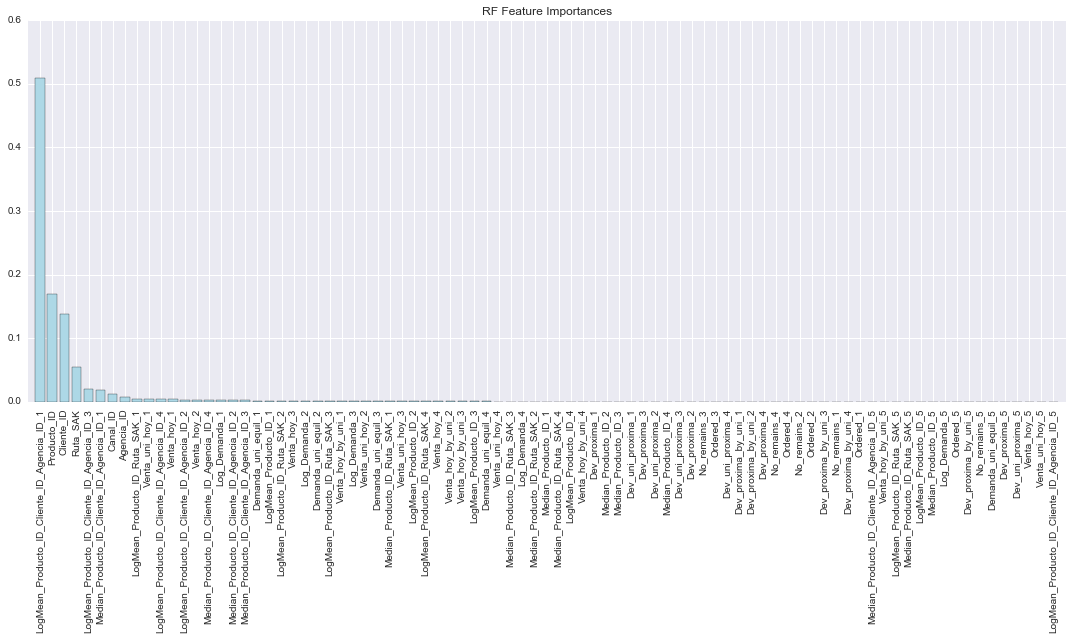

Train: 0.246035360629
Test: 0.485114726954


In [35]:
from sklearn.metrics import mean_squared_error

plot_feature_importances(rf, X_train.columns)

print('Train:', np.sqrt(mean_squared_error(y_train, rf.predict(X_train.fillna(-999)))))
print('Test:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test.fillna(-999)))))

## For 11 week prediction

In [31]:
X_train2 = X_train[[col for col in X_train.columns if '_1' != col[-2:]]]
X_test2 = X_test[[col for col in X_test.columns if '_1' != col[-2:]]]
X_eval2 = X_eval[[col for col in X_eval.columns if '_1' != col[-2:]]]
X_train2.shape, X_train.shape

((578138, 69), (578138, 85))

In [32]:
rf2 = RandomForestRegressor(n_estimators=3, criterion='mse', n_jobs=-1, verbose=0)

rf2.fit(X_train2.fillna(-999), y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

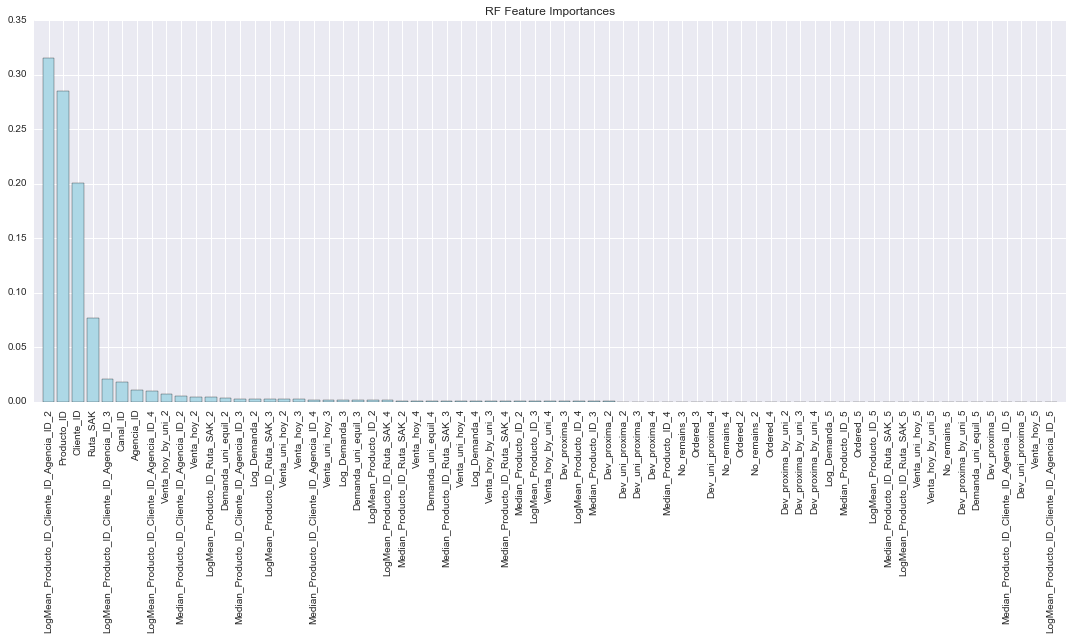

Train: 0.282997235257
Test: 0.543594868338


In [36]:
from sklearn.metrics import mean_squared_error

plot_feature_importances(rf2, X_train2.columns)

print('Train:', np.sqrt(mean_squared_error(y_train, rf2.predict(X_train2.fillna(-999)))))
print('Test:', np.sqrt(mean_squared_error(y_test, rf2.predict(X_test2.fillna(-999)))))